# Beat-finding using Fourier transform

Finding a best-describing underlying beat in a sequence can be done using [Fourier transforms](https://en.wikipedia.org/wiki/Fourier_transform), where we decompose a signal into its frequency components.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message="Matplotlib ")

We create an example sequence, and initiate a random number generator with a seed, so you will get the same output as we:

In [2]:
from thebeat import Sequence
import numpy as np

rng = np.random.default_rng(seed=123)

seq = Sequence.generate_random_normal(n_events=100, mu=500, sigma=25, rng=rng)

Now we plot the Fourier transform. Because we created our Sequence object using millisecond values, we will choose a unit size of 1000.

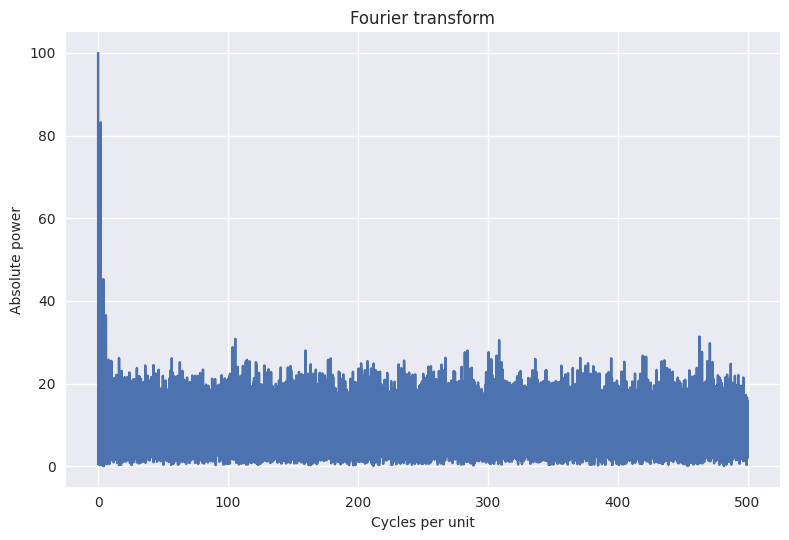

In [3]:
from thebeat.stats import fft_plot

fft_plot(seq, unit_size=1000);

On the x axis we see the number of 'cycles per second'. We chose a unit size of 1000 (ms), and so 100 cycles per unit in our case means 100 cycles per second. That's very fast, and we probably don't expect some sort of underlying beat to happen at that pace. So, we limit the x axis by setting ``x_max`` to 10 (i.e. 10 Hz, or a beat IOI of 100 ms, in our case).

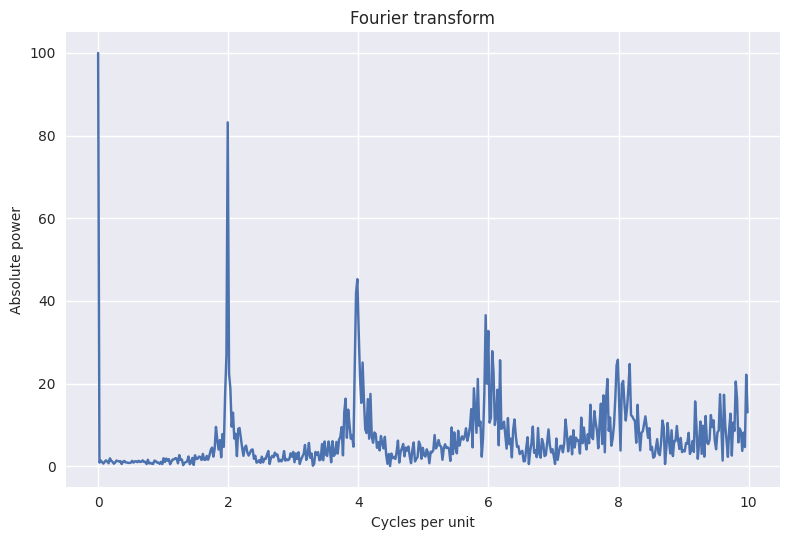

In [4]:
fft_plot(seq, unit_size=1000, x_max=10);

We see a *very* clear peak at around 2 cycles per second, i.e. every 500 ms.

---

In [7]:
from thebeat.stats import fft_values

# Get x and y data
x, y = fft_values(seq, unit_size=1000, x_max=10)

# Subset data so that we skip the max power at x = 0
x, y = x[1:], y[1:]

# Get index of maximum y value
max_y_index = np.argmax(y)
max_x = x[max_y_index]
print(f"The largest peak is at {max_x} Hz")
print(f"This corresponds to a beat IOI of {1000 / max_x} ms")


The largest peak is at 1.9925931889541908 Hz
This corresponds to a beat IOI of 501.8585858585858 ms
